<a href="https://colab.research.google.com/github/CHIRANJEET12/Machine-Learning/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
df = fetch_california_housing()
dataset = pd.DataFrame(df.data, columns=df.feature_names)

In [ ]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


 Interpretation: Values close to 1 or -1 show strong relationships. Look for features highly correlated with MedInc or AveRooms, etc.

In [ ]:
correlation = dataset.corr()

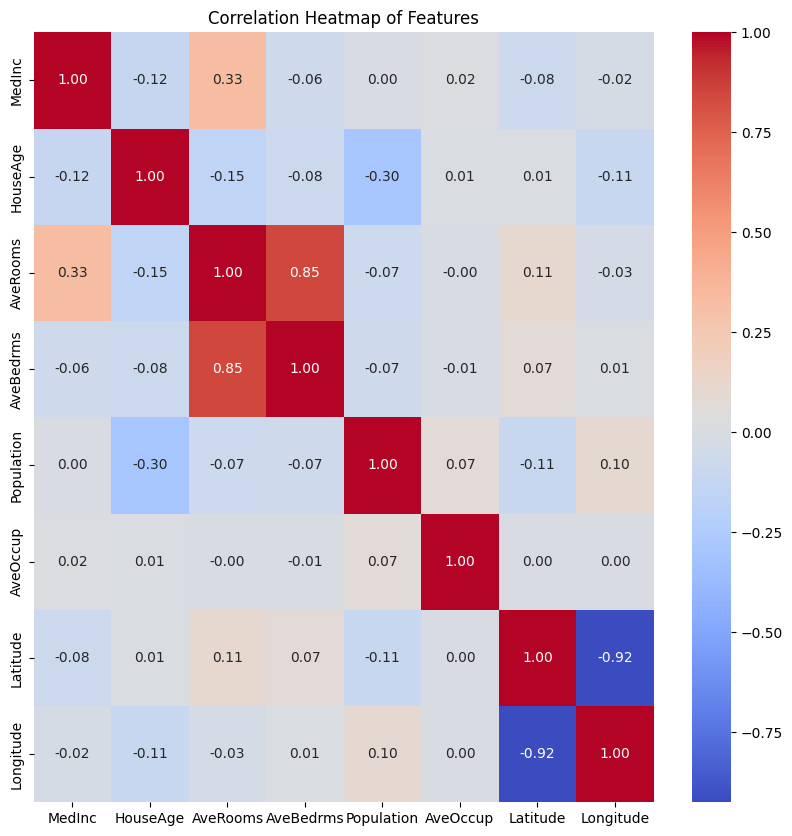

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

Interpretation: Look at how each feature visually relates to another — like whether MedInc rises with AveRooms.

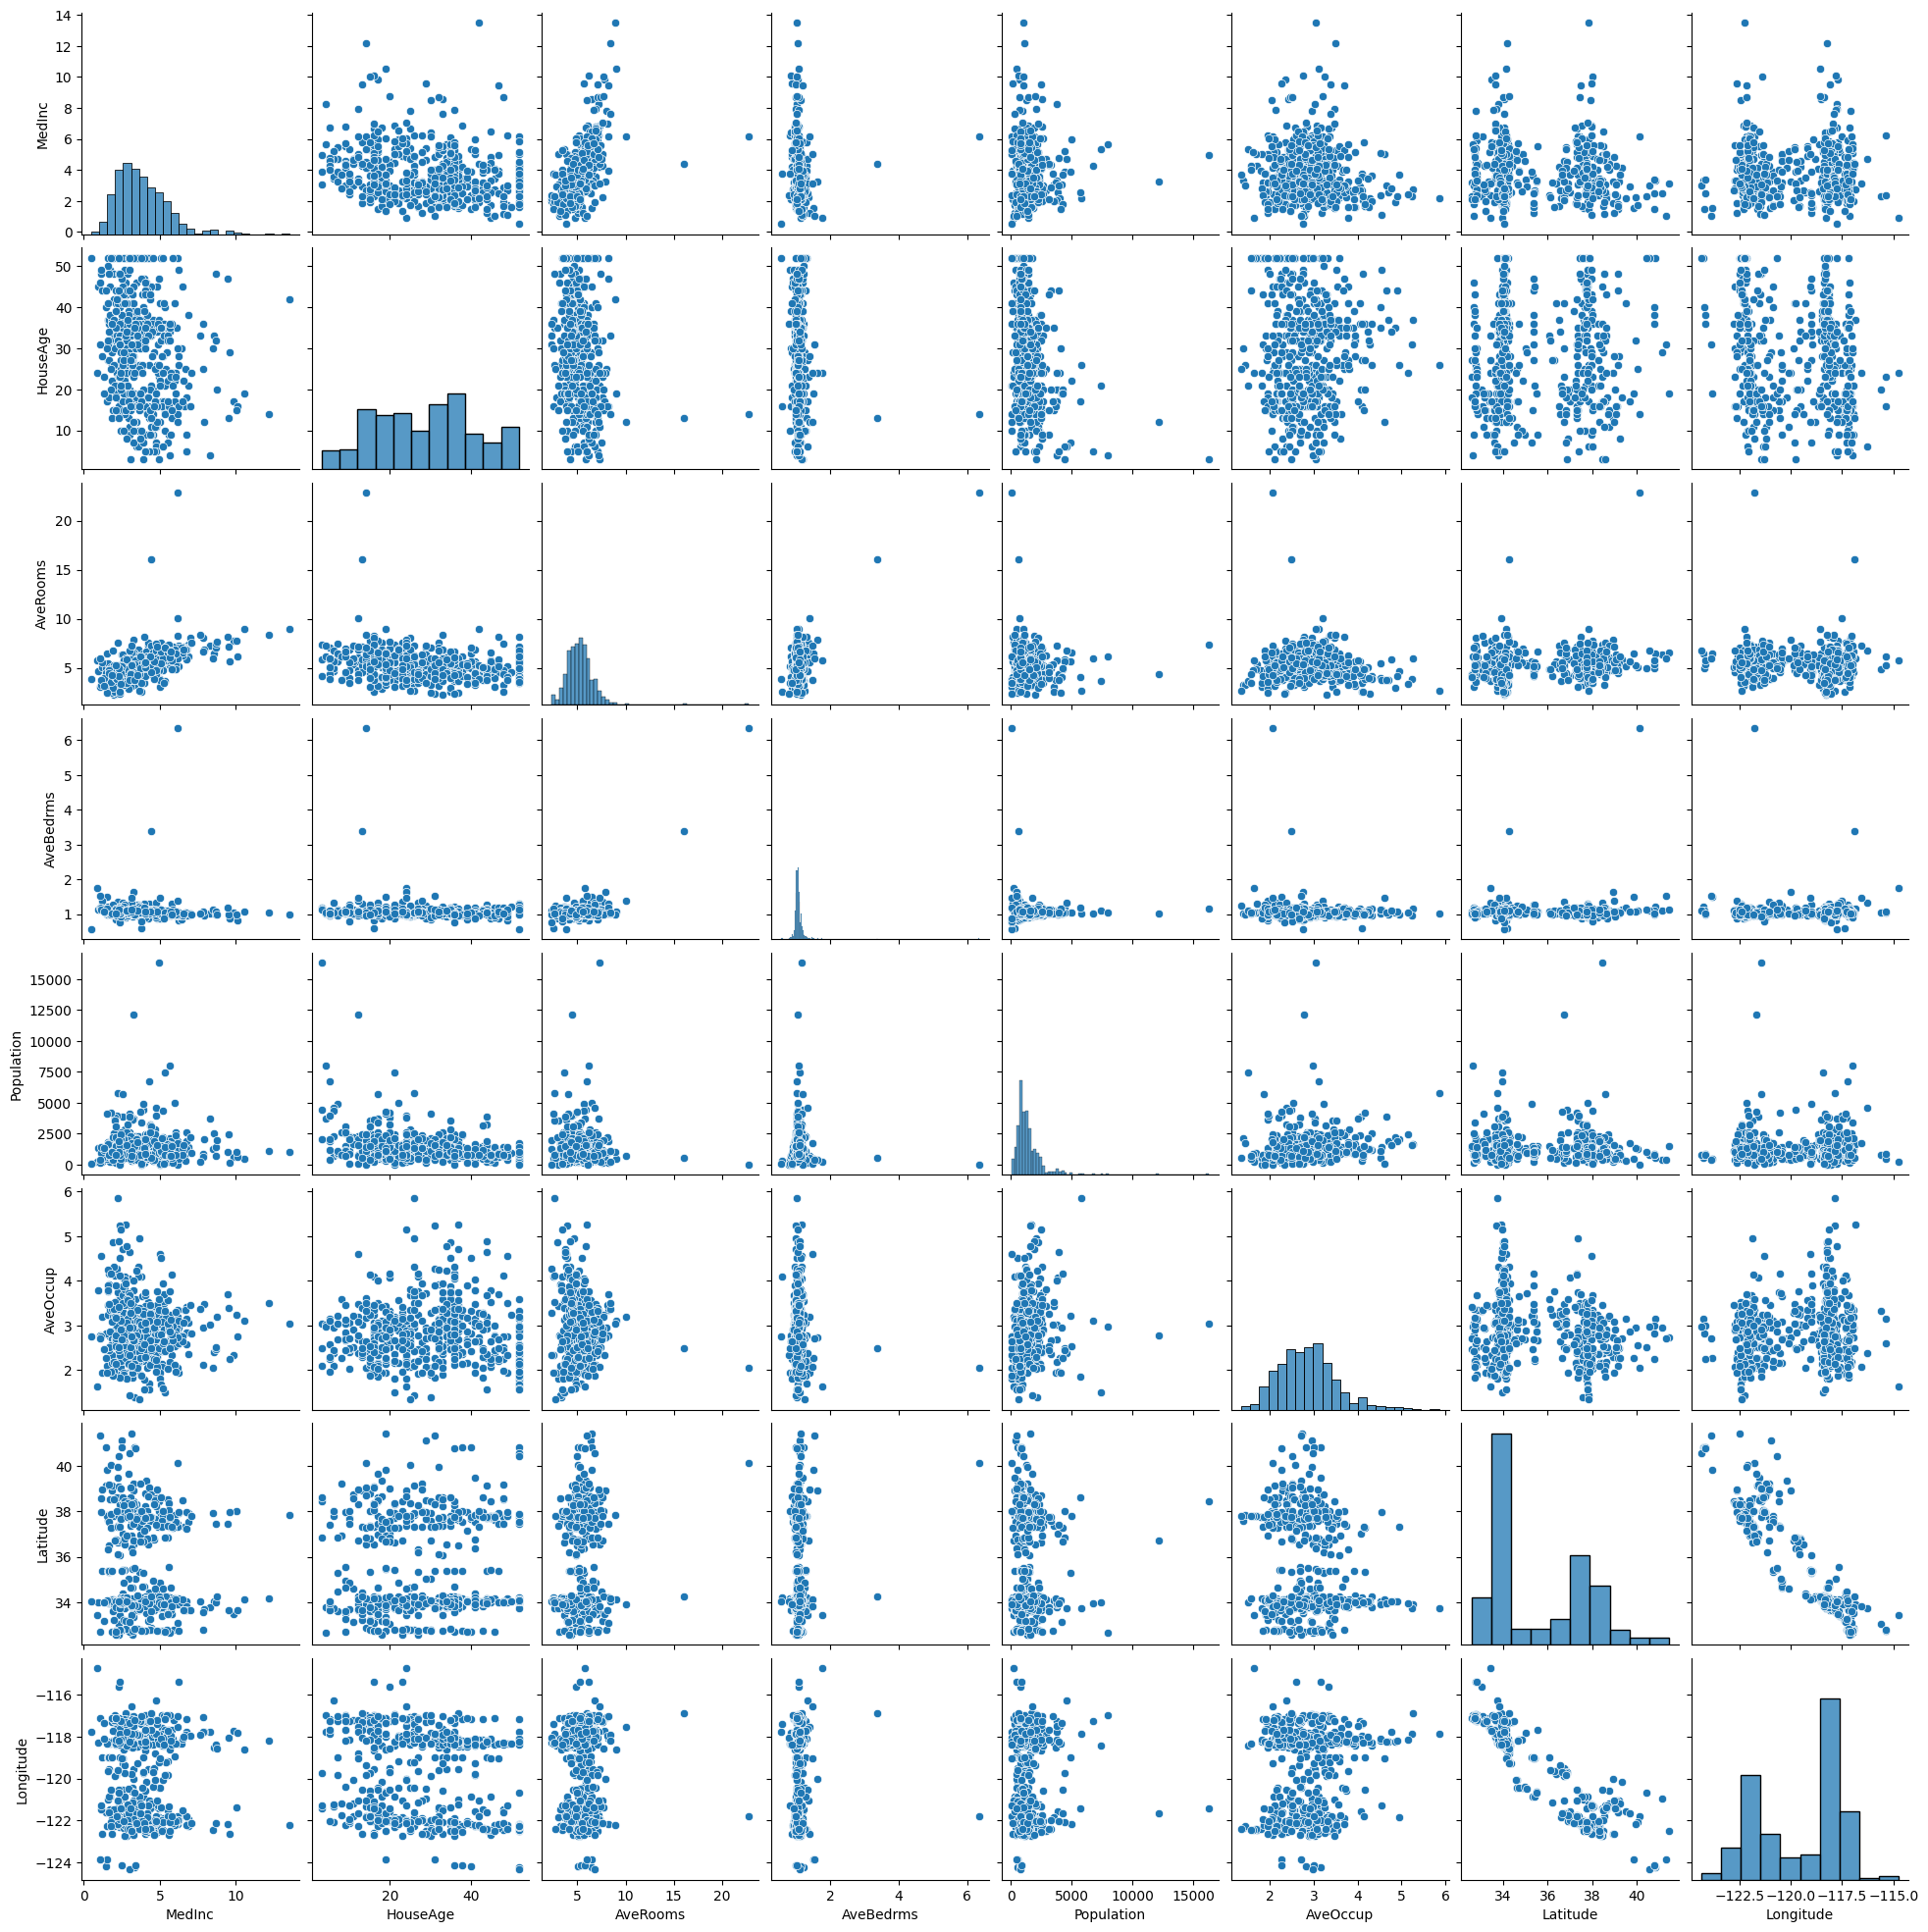

In [ ]:
sns.pairplot(dataset.sample(500))
plt.show()

Compare distributions side-by-side.


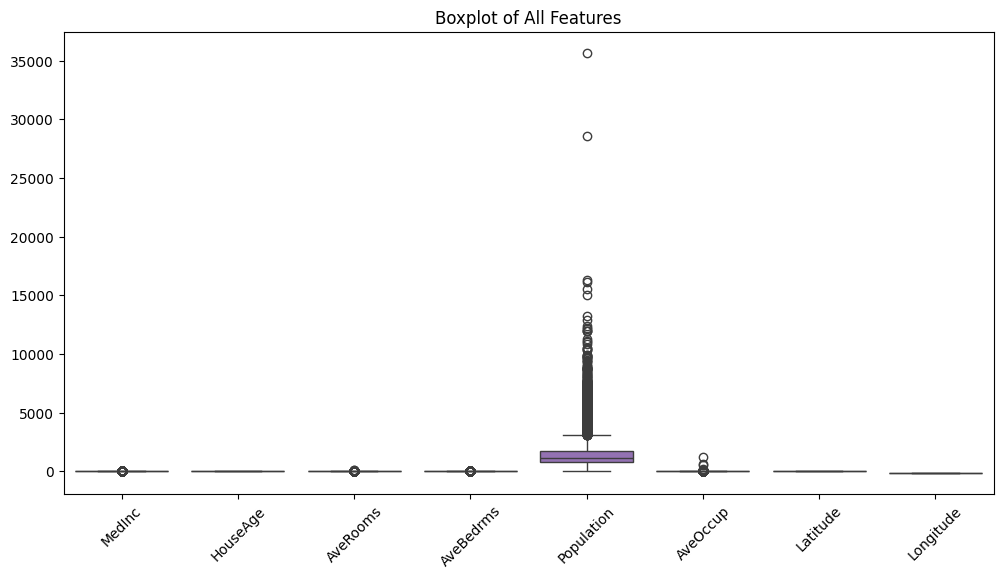

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset)
plt.xticks(rotation=45)
plt.title("Boxplot of All Features")
plt.show()

Plot histograms of each feature to compare value distribution

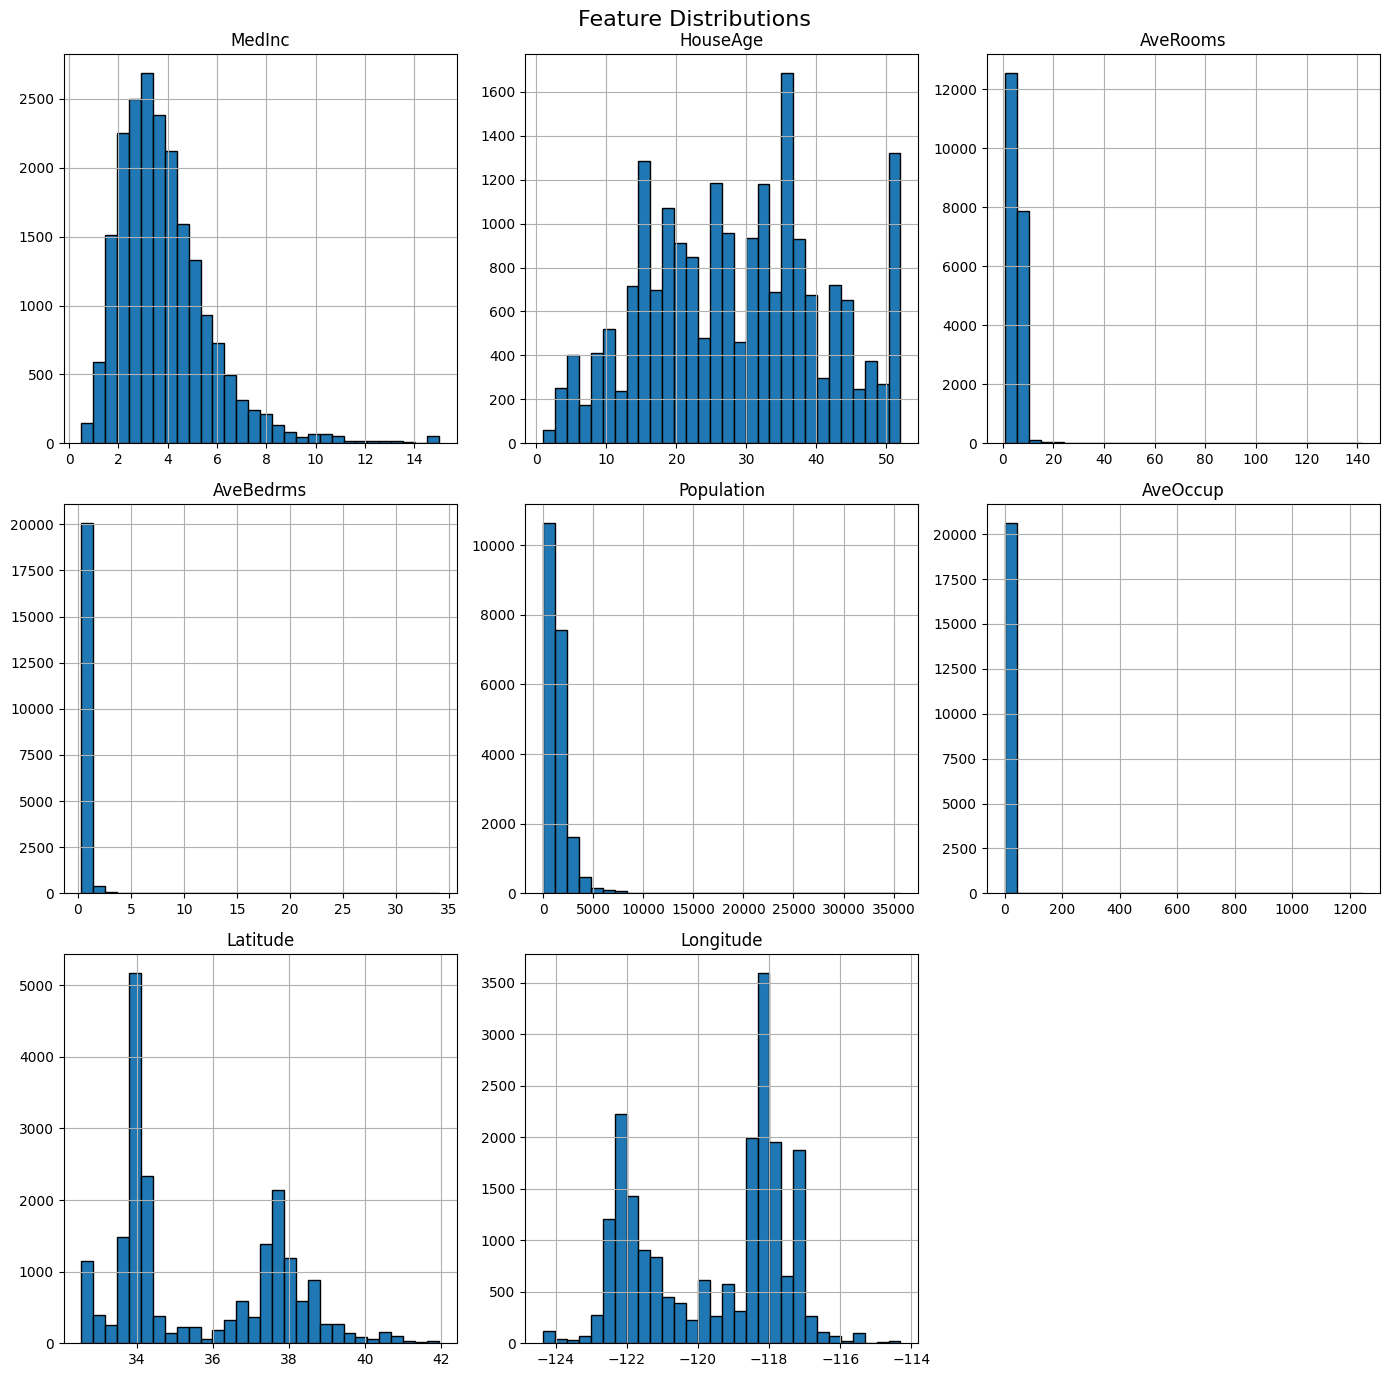

In [ ]:
dataset.hist(bins=30, figsize=(14, 14), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

Scatter Plot (Two Features)
For specific comparisons, like between MedInc and AveRooms:

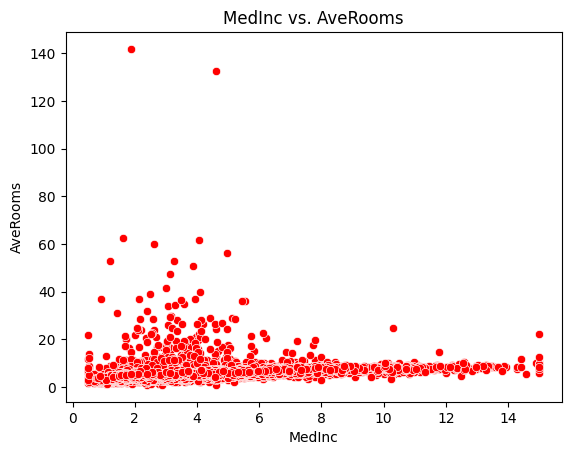

In [ ]:
sns.scatterplot(x='MedInc', y='AveRooms', data=dataset, color='red')
plt.title("MedInc vs. AveRooms")
plt.show()

In [ ]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
dataset.AveBedrms

,AveBedrms
0,1.023810
1,0.971880
2,1.073446
3,1.073059
4,1.081081
...,...
20635,1.133333
20636,1.315789
20637,1.120092
20638,1.171920


In [ ]:
dataset.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [ ]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
dataset.mean()

,0
MedInc,3.870671
HouseAge,28.639486
AveRooms,5.429000
AveBedrms,1.096675
Population,1425.476744
AveOccup,3.070655
Latitude,35.631861
Longitude,-119.569704


Independent and Dependeent features

In [ ]:
X = dataset
y = df.target


train test and split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

standardizing the dataset for good and optimized output model

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# scalar.inverse_transform(X_train)

cross validation

In [ ]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print("Cross-validated MSE (negative):", mse)
print("Mean MSE:", np.mean(mse))

Cross-validated MSE (negative): [-0.56799593 -0.52918854 -0.48456478 -0.51627013 -0.54833859 -0.47884524
 -0.47828648 -0.55465187 -0.55647389 -0.54248888]
Mean MSE: -0.5257104326777


prediction

In [ ]:
reg_pred = regression.predict(X_test)
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

compare it with truth value (y_test)

In [ ]:
reg_pred.mean()

np.float64(2.0682312085732097)

In [ ]:
y_test.mean()

np.float64(2.066968142764858)

In [ ]:
actual_mean = y_test.mean()
predicted_mean = reg_pred.mean()

In [ ]:
labels = ['Actual Mean', 'Predicted Mean']
values = [actual_mean,predicted_mean]

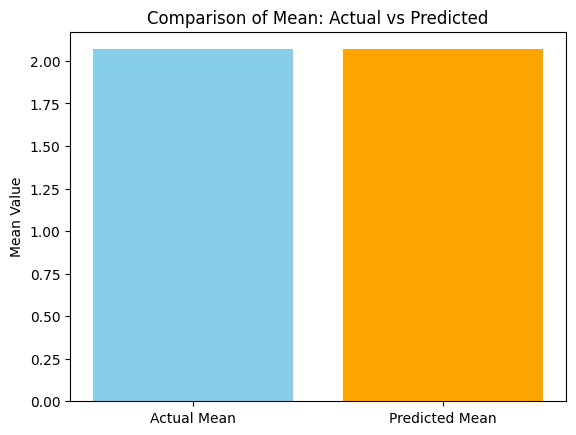

In [ ]:
plt.bar(labels, values, color=['skyblue', 'orange'])
plt.title('Comparison of Mean: Actual vs Predicted')
plt.ylabel('Mean Value')
plt.show()

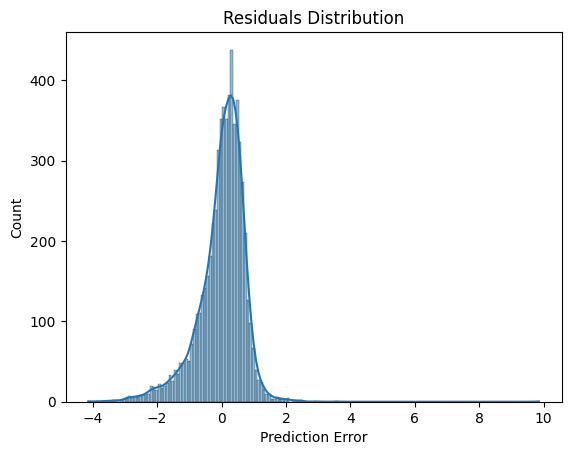

In [ ]:
sns.histplot(reg_pred - y_test, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")
plt.show()

In [ ]:
score = r2_score(y_test, reg_pred)
print("R² Score:", score)

R² Score: 0.5957702326061664


# Ridge and Lasso

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge_regression = Ridge()

In [ ]:
lasso_regression = Lasso()

In [ ]:
parameter = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 3, 4, 30, 40, 50]}
ridgecv = GridSearchCV(ridge_regression,parameter,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 3, 4, 30, 40, 50]},
             scoring='neg_mean_squared_error')

In [ ]:
parametre1 = {'alpha': [1e-5, 1e-4, 1e-3, 0.01, 0.1, 0.5, 1, 2, 5, 10]}
lassocv = GridSearchCV(lasso_regression,parametre1,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2,
                                   5, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridgecv.best_params_)

{'alpha': 5}


In [ ]:
lassocv.best_params_

{'alpha': 0.001}

In [ ]:
print(ridgecv.best_score_)

-0.5268179966861514


In [ ]:
print(lassocv.best_score_)

-0.526481690640263


In [ ]:
ridge_pred = ridgecv.predict(X_test)
print(ridge_pred)

[0.72799408 1.76647219 2.70889662 ... 2.07364426 1.57452579 1.82666041]


In [ ]:
lasso_pred = lassocv.predict(X_test)
print(lasso_pred)

[0.73274466 1.76429632 2.69669069 ... 2.06863174 1.57961496 1.82206757]


In [ ]:
ridge_pred.mean()

np.float64(2.0682203679286504)

In [ ]:
lasso_pred.mean()

np.float64(2.068210131992155)

<Axes: ylabel='Count'>

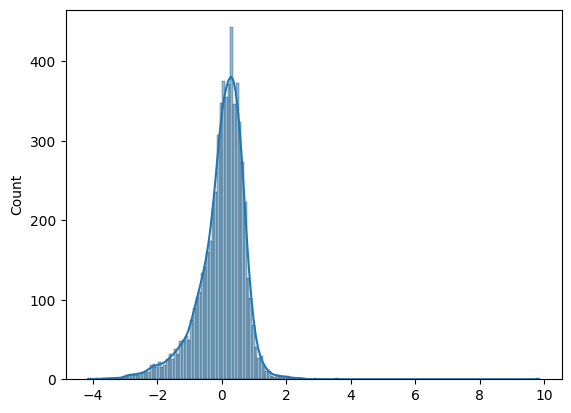

In [ ]:
sns.histplot(ridge_pred - y_test, kde=True)

<Axes: ylabel='Count'>

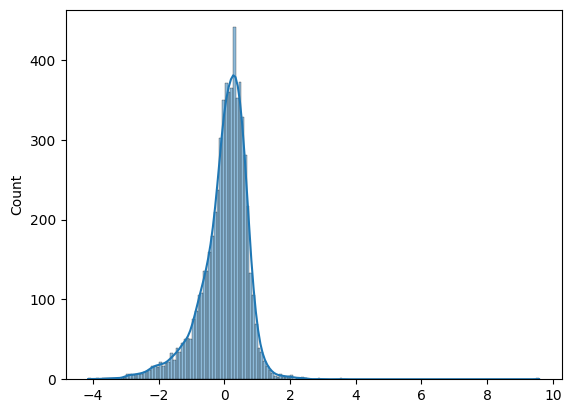

In [ ]:
sns.histplot(lasso_pred - y_test, kde=True)

In [ ]:
score1 =r2_score(y_test, ridge_pred)
score1

0.5958597389519957

In [ ]:
score2 = r2_score(y_test, lasso_pred)
score2

0.5963975777208825

In [ ]:
from sklearn.linear_model import Lasso
import numpy as np

X = np.array([
    [1, 2],
    [2, 1],
    [3, 0],
    [0, 3]
])

y = np.array([3, 2, 3, 3])

model = Lasso(alpha=0.01)

model.fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-0.092  0.   ]
Intercept: 2.888


# Logistic Regression


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [11]:
df=df[df['species']!='setosa']

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [14]:
df['species'] = df['species'].map({'versicolor':0,'virginica':1})

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [16]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
y

,species
50,0
51,0
52,0
53,0
54,0
...,...
145,1
146,1
147,1
148,1


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
classifier = LogisticRegression()
# classifier.fit(X_train, y_train)

LogisticRegression()

hyper parametre tuning

In [26]:
parametre = {"penalty":['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,7,8,10,20,30,40,50],'max_iter':[100,200,300]}

In [28]:
classifier_regresser = GridSearchCV(classifier,param_grid=parametre,cv=5,scoring='accuracy')

In [29]:
classifier_regresser.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
390 fits failed out of a total of 585.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
195 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [30]:
classifier_regresser.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [31]:
classifier_regresser.best_score_

np.float64(0.9733333333333334)

In [33]:
#prediction
y_pred = classifier_regresser.predict(X_test)

In [36]:
#accuracy
accuracy_score(y_test,y_pred)

0.92

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [40]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000


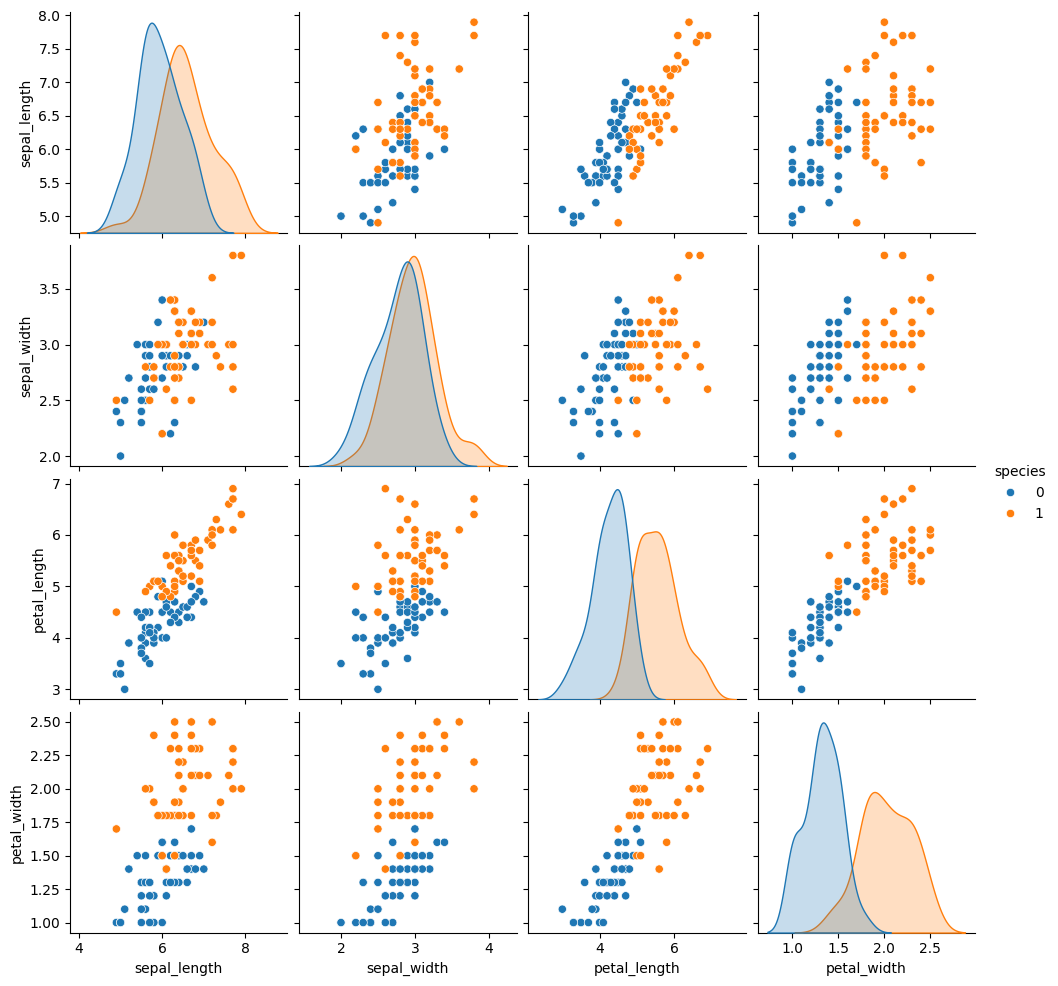

In [42]:
sns.pairplot(df,hue="species")